In [0]:
from fastai import *

In [0]:
from google.colab import drive

In [14]:
drive.mount('/content/gdrive', force_remount=True)
root_dir="/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [3]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *

In [0]:
path=Path(base_dir + 'data/cars')
path.ls();

In [0]:
classes = ['models','modelx','lucidair','model3','taycan','rimac','ff91']

In [0]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path, train=".",valid_pct=0.15, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [18]:
data.classes


['ff91', 'lucidair', 'model3', 'models', 'modelx', 'rimac', 'taycan']

In [22]:
len(data.train_ds), len(data.valid_ds)

(1812, 319)

In [23]:
learn=cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 90.8MB/s]


In [24]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.149628,1.202571,0.332288,05:53
1,1.537395,0.863699,0.282132,02:02
2,1.174138,0.725091,0.241379,02:02
3,0.907661,0.673697,0.238245,02:02


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


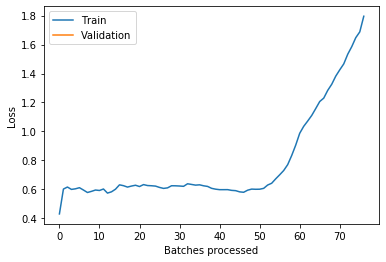

In [28]:
learn.recorder.plot_losses()

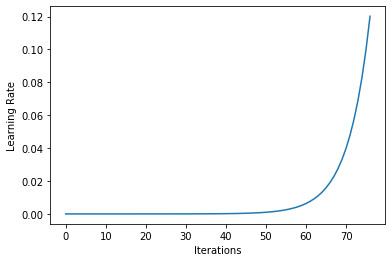

In [29]:
learn.recorder.plot_lr()

Min numerical gradient: 9.12E-07
Min loss divided by 10: 9.12E-08


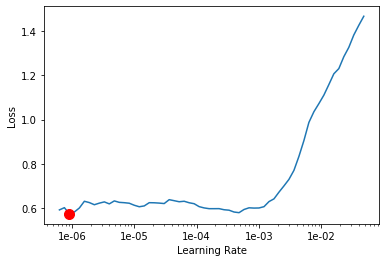

In [30]:
learn.recorder.plot(suggestion=True)

In [31]:
min_grad_lr = learn.recorder.min_grad_lr
min_grad_lr

9.120108393559096e-07

In [32]:
#learn.fit_one_cycle(2, max_lr=slice(1e-05,1e-03))
learn.fit_one_cycle(2, max_lr=min_grad_lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.547132,0.667539,0.238245,02:05
1,0.627610,0.671577,0.238245,02:04


In [0]:
learn.save('stage-2')

In [34]:
learn.fit_one_cycle(2, max_lr=slice(min_grad_lr,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.593307,0.615628,0.216301,02:02
1,0.545065,0.579741,0.191223,02:01


In [0]:
learn.save('stage-2b')

In [0]:
learn.load('stage-2b');

In [0]:
i=ClassificationInterpretation.from_learner(learn)

In [0]:
losses, idxs = i.top_losses()

In [0]:
learn.export()

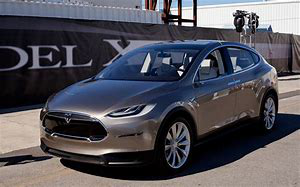

In [38]:
testImg = open_image(base_dir+'teslax.jpeg')
testImg


In [0]:
learn=load_learner(path)

In [40]:
pred_class,pred_idx, outputs = learn.predict(testImg)
pred_class

Category modelx